In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
from sklearn.feature_selection import VarianceThreshold
encoded_df = pd.get_dummies(df)
VarianceThreshold_ = VarianceThreshold()
remove_constant = VarianceThreshold_.fit_transform(encoded_df)
selected_columns = encoded_df.columns[VarianceThreshold_.get_support()]
remove_constant = pd.DataFrame(remove_constant, columns = selected_columns)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [21]:

num_column = remove_constant.select_dtypes(include=["float64" , "int64"]).columns
remove_constant[num_column] = remove_constant[num_column].fillna(num_column.mean())
catagorial_column = df.select_dtypes(include=["object"]).columns
for feature in catagorial_column:
  df[feature] = df[feature].fillna(df[feature].mode()[0])


AttributeError: 'Index' object has no attribute 'mean'

In [24]:
from scipy.stats import zscore
for column in ['math score', 'reading score']:
    z_scores = zscore(df[column])
    df = df[(abs(z_scores) < 3)]

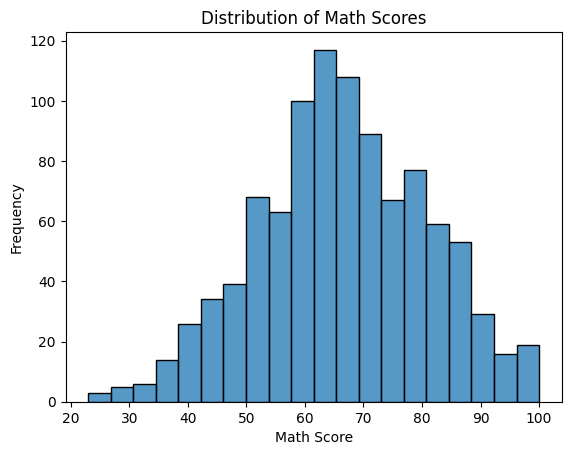

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['math score'], bins=20)
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()


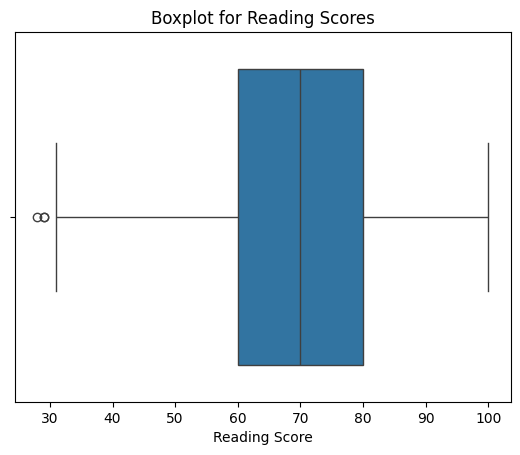

In [26]:
sns.boxplot(x=df['reading score'])
plt.title("Boxplot for Reading Scores")
plt.xlabel("Reading Score")
plt.show()


In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', df)
plt.title('Countplot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-27-b2603b95acf4>, line 2)